# <b/><font color='green'><center>Image Watermarking using OpenCV</center></font>

## <b/> Importing Libraries

In [1]:
import numpy as np
import cv2
import requests
from PIL import Image

## <b/> Reading Image from Url

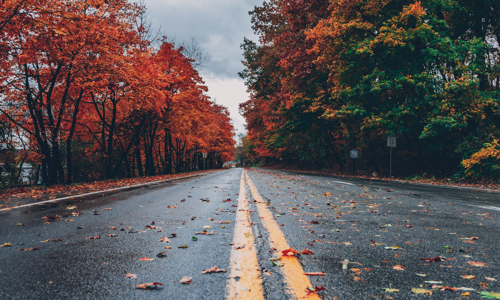

In [2]:
# Open an image from a URL and create a PIL Image object
image = Image.open(requests.get('https://images.pexels.com/photos/1563356/pexels-photo-1563356.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2', stream=True).raw)

# Resize the image to 500x300 pixels for logo & text
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

## <b/> Reading Logo

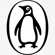

In [3]:
# Open a logo image from a URL and create a PIL Image object
logo = Image.open(requests.get('https://toppng.com/uploads/preview/enguin-little-black-classics-penguin-random-house-logo-11563160655ed0ipy9wep.png', stream=True).raw)

# Resize the logo image to 55x55 pixels
logo = logo.resize((55,55))
logo

## <b/> Convert Image into RGB numpy array

In [4]:
# Convert the resized image for logo to a NumPy array and ensure it's in RGB mode
image_logow = np.array(image_logow.convert('RGB'))

# Get the height and width of the resized image for logo
h_image, w_image, _ = image_logow.shape

# Convert the resized logo image to a NumPy array and ensure it's in RGB mode
logo = np.array(logo.convert('RGB'))

# Get the height and width of the resized logo image
h_logo, w_logo, _ = logo.shape

## <b/> Image location for Watermarks

In [5]:
# Calculate the center coordinates of the resized image for logo
center_y = int(h_image / 2)
center_x = int(w_image / 2)

# Calculate the top-left coordinates for placing the logo in the center of the image
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)

# Calculate the bottom-right coordinates for placing the logo in the center of the image
bottom_y = top_y + h_logo
right_x = left_x + w_logo

## <b/> Get Region of Interest(ROI) and place the logo on ROI

In [6]:
# Define the region of interest (ROI) in the resized image for logo where the logo will be placed
roi = image_logow[top_y:bottom_y, left_x:right_x]

# Blend the ROI and the logo using addWeighted function
result = cv2.addWeighted(roi, 1, logo, 1, 0)

# Draw a horizontal line from the left edge to the left boundary of the logo, through the center of the image
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)

# Draw a horizontal line from the right boundary of the logo to the right edge of the image, through the center of the image
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

# Place the blended result back into the original resized image for logo
image_logow[top_y:bottom_y, left_x:right_x] = result

## <b> Visualize the Image

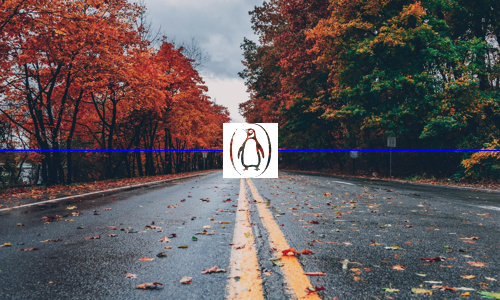

In [7]:
# Convert the NumPy array back to a PIL Image in RGB mode
img = Image.fromarray(image_logow, 'RGB')
img

## <b/> Text Watermark

In [12]:
# Convert the resized image for text to a NumPy array and ensure it's in RGB mode
image_text = np.array(image_textw.convert('RGB'))

# Add the text "AnkushK" to the bottom right corner of the image
cv2.putText(image_text, text='AnkushK', org=(w_image-95, h_image-10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.6,
           color=(255,0,0), thickness=1, lineType=cv2.LINE_4)

array([[[141,  61,  54],
        [165,  83,  66],
        [ 35,  38,  47],
        ...,
        [ 19,  35,  43],
        [ 15,  37,  39],
        [ 20,  39,  43]],

       [[140,  50,  43],
        [194, 108,  75],
        [ 58,  52,  47],
        ...,
        [ 18,  35,  42],
        [ 19,  35,  40],
        [ 18,  33,  38]],

       [[141,  44,  43],
        [169,  63,  58],
        [ 97,  50,  46],
        ...,
        [ 19,  36,  43],
        [ 23,  32,  39],
        [ 26,  38,  44]],

       ...,

       [[ 48,  62,  73],
        [ 55,  68,  79],
        [ 56,  68,  80],
        ...,
        [164, 197, 156],
        [170, 187, 136],
        [179, 176, 105]],

       [[ 53,  68,  79],
        [ 53,  65,  77],
        [ 50,  59,  71],
        ...,
        [110, 138,  82],
        [130, 148,  92],
        [151, 148,  82]],

       [[ 62,  77,  88],
        [ 53,  65,  77],
        [ 52,  61,  74],
        ...,
        [ 36,  46,  38],
        [ 58,  67,  50],
        [ 83,  80,  60]]

## <b/> Visualize the Text Watermark

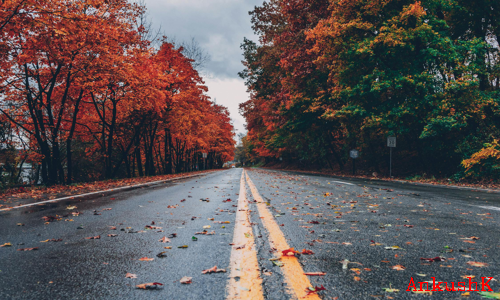

In [13]:
# Convert the NumPy array back to a PIL Image in RGB mode
t_img = Image.fromarray(image_text, 'RGB')
t_img

* Here we can observe the text as a watermark on the image in the bottom right corner.

-----

## Conclusion:
### Adding a watermark to an image works as a copyright. Different organizations can use it to make their content secure so that their content cannot be misused withour their license or paid version.